In [7]:
breeds = ["beagle", "bernese_mountain_dog", "doberman", "labrador_retriever", "siberian_husky"]

In [8]:
import tensorflow as tf

In [9]:
args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "batch_size": 32,
    "image_size": (256, 256),
    "seed": 1,
    "validation_split": .2,
    "class_names": breeds
}

In [10]:
train = tf.keras.utils.image_dataset_from_directory(
    "images",
    subset="training",
    **args
)


Found 926 files belonging to 5 classes.
Using 741 files for training.


In [11]:
test = tf.keras.utils.image_dataset_from_directory(
  "images",
  subset="validation",
    **args
)

Found 926 files belonging to 5 classes.
Using 185 files for validation.


In [12]:
train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [13]:
first =train.take(1)
first

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5), dtype=tf.float32, name=None))>

In [14]:
images, labels = list(first)[0]
first_image = images[0]

In [15]:
first_image

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 17.658463,  26.107117,  18.948654],
        [ 25.686066,  24.405075,  20.66211 ],
        [ 29.847656,  24.580734,  21.669708],
        ...,
        [124.332245, 121.332245, 116.332245],
        [122.09987 , 119.09987 , 114.09987 ],
        [120.47656 , 117.47656 , 112.47656 ]],

       [[ 18.993622,  26.708206,  22.481903],
        [ 26.17189 ,  26.147278,  24.414856],
        [ 29.454437,  22.608734,  22.083344],
        ...,
        [121.059235, 118.059235, 113.059235],
        [123.12695 , 120.12695 , 115.12695 ],
        [121.17383 , 118.17383 , 113.17383 ]],

       [[ 17.373474,  24.858932,  23.791443],
        [ 19.348282,  19.05922 ,  20.95375 ],
        [ 25.176407,  18.02797 ,  19.969376],
        ...,
        [123.03125 , 120.03125 , 115.03125 ],
        [124.5918  , 121.5918  , 116.5918  ],
        [122.63867 , 119.63867 , 114.63867 ]],

       ...,

       [[201.      , 206.      , 212.      ],
        [202.

In [16]:
first_image[:3,:3,0]

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[17.658463, 25.686066, 29.847656],
       [18.993622, 26.17189 , 29.454437],
       [17.373474, 19.348282, 25.176407]], dtype=float32)>

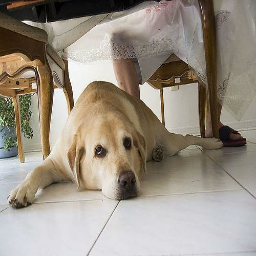

In [17]:
from PIL import Image

Image.fromarray(images[0].numpy().astype("uint8"))

In [18]:
print(labels[0])

tf.Tensor([0. 0. 0. 1. 0.], shape=(5,), dtype=float32)


In [19]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(breeds))
])

C:\Users\ADMIN\.conda\envs\nlp_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(
    train,
    validation_data=test,
    epochs=5,
    verbose=1
)

Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.2078 - loss: 119.2362 - val_accuracy: 0.2486 - val_loss: 12.9432
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.3052 - loss: 6.1087 - val_accuracy: 0.2649 - val_loss: 2.0651
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.4358 - loss: 1.4804 - val_accuracy: 0.3297 - val_loss: 1.7202
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6492 - loss: 0.9128 - val_accuracy: 0.3081 - val_loss: 1.6920
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.8368 - loss: 0.5456 - val_accuracy: 0.3027 - val_loss: 1.9728


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1048576)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │     134,217,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,656,849 (1.50 GB)

 Trainable params: 134,218,949 (512.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 268,437,900 (1.00 GB)

<Axes: >

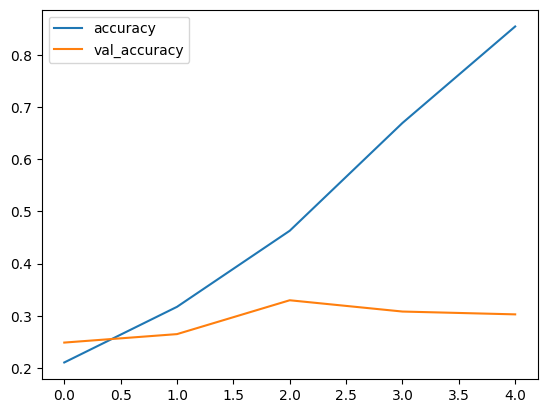

In [24]:
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[["accuracy", "val_accuracy"]].plot()

In [25]:
def train_model(network, epochs=5):
    model = Sequential(network)

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(
      train,
      validation_data=test,
      epochs=epochs
    )
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df, model

In [26]:
network = [
  tf.keras.layers.Rescaling(1./255),
  layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(breeds))
]

history_df, model = train_model(network)

Epoch 1/5


C:\Users\ADMIN\.conda\envs\nlp_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 455ms/step - accuracy: 0.2081 - loss: 2.5400 - val_accuracy: 0.2432 - val_loss: 1.6007
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.2211 - loss: 1.5981 - val_accuracy: 0.2595 - val_loss: 1.5895
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 375ms/step - accuracy: 0.2714 - loss: 1.5488 - val_accuracy: 0.3135 - val_loss: 1.4924
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.4386 - loss: 1.3961 - val_accuracy: 0.2703 - val_loss: 1.4839
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 387ms/step - accuracy: 0.5338 - loss: 1.1821 - val_accuracy: 0.3405 - val_loss: 1.5697


<Axes: >

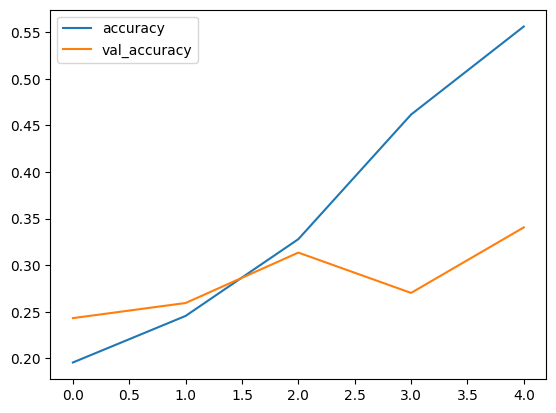

In [27]:
history_df[["accuracy", "val_accuracy"]].plot()

In [28]:
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomFlip("horizontal", seed=1),
      layers.RandomRotation(0.2, seed=1),
    layers.RandomZoom(0.2, seed=1),
  ]
)


full_network = [
    data_augmentation
] + network

history_df, model = train_model(full_network, epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 447ms/step - accuracy: 0.3181 - loss: 1.5221 - val_accuracy: 0.3405 - val_loss: 1.4806
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 434ms/step - accuracy: 0.4023 - loss: 1.4264 - val_accuracy: 0.2865 - val_loss: 1.4618
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 469ms/step - accuracy: 0.4266 - loss: 1.3580 - val_accuracy: 0.2811 - val_loss: 1.4769
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 415ms/step - accuracy: 0.4425 - loss: 1.3540 - val_accuracy: 0.2973 - val_loss: 1.4644
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 461ms/step - accuracy: 0.4684 - loss: 1.2952 - val_accuracy: 0.3297 - val_loss: 1.4368
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 496ms/step - accuracy: 0.4772 - loss: 1.2565 - val_accuracy: 0.3838 - val_loss: 1.4496
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 436ms/step - accuracy: 0.5137 - loss: 1.2343 - val_accuracy: 0.3568 - val_loss: 1.5348
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 434ms/step - accuracy: 0.4980 - loss: 1.2354 - val_accu

<Axes: >

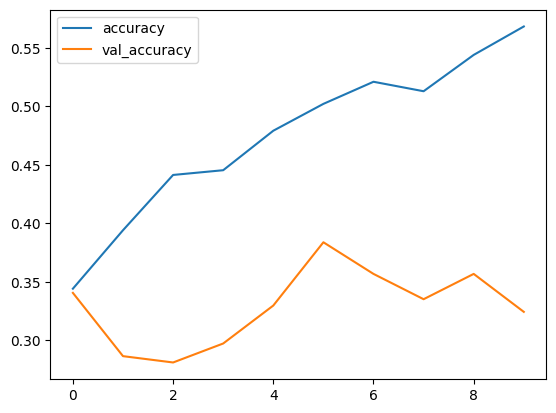

In [29]:
history_df[["accuracy", "val_accuracy"]].plot()

In [30]:
preds = model.predict(test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


In [31]:
import numpy as np
predicted_class = np.argmax(preds, axis=1)

In [32]:

actual_labels = np.concatenate([y for x, y in test], axis=0)

In [33]:
import itertools

actual_image = [x.numpy().astype("uint8") for x, y in test]
actual_image = list(itertools.chain.from_iterable(actual_image))
actual_image = [Image.fromarray(a) for a in actual_image]

In [34]:

actual_class = np.argmax(actual_labels, axis=1)

In [35]:
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_image), columns=["prediction", "actual", "image"])


In [36]:
pred_df["prediction"] = pred_df["prediction"].apply(lambda x: breeds[x])
pred_df["actual"] = pred_df["actual"].apply(lambda x: breeds[x])

,prediction,actual,image
0,beagle,labrador_retriever,
1,doberman,bernese_mountain_dog,
2,bernese_mountain_dog,bernese_mountain_dog,
3,beagle,doberman,
4,siberian_husky,labrador_retriever,
5,beagle,labrador_retriever,
6,doberman,beagle,
7,bernese_mountain_dog,beagle,
8,beagle,siberian_husky,
9,doberman,doberman,

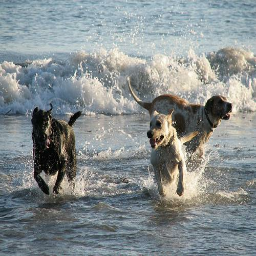
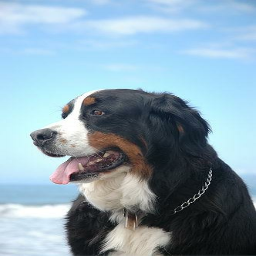
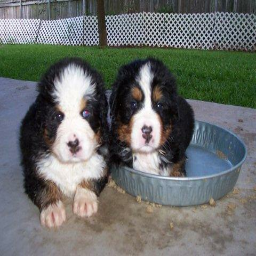
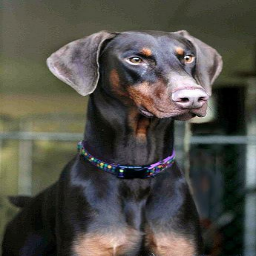
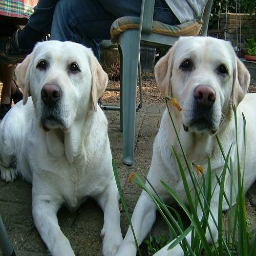
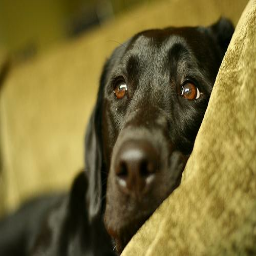
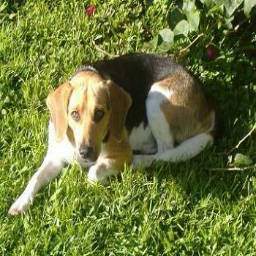
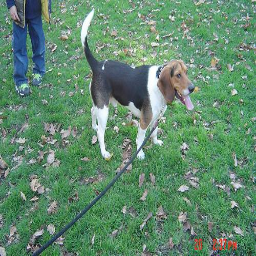
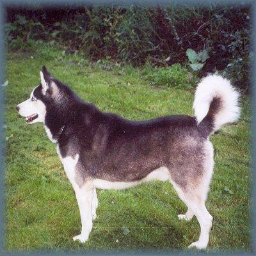
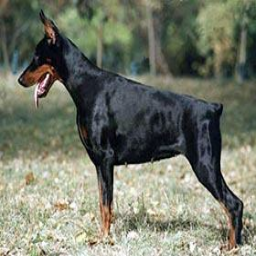

In [37]:
import base64
import io

def image_formatter(img):
    with io.BytesIO() as buffer:
        img.save(buffer, 'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f'<img src="data:image/jpeg;base64,{img_str}">'

pred_df.head(10).style.format({'image': image_formatter})